In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.dates as mdates

In [3]:
data = pd.read_csv('microsoft_cleaned_data.csv')

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [4]:
def compute_bollinger_bands(series, window):
	rolling_mean = series.rolling(window=window).mean()
	rolling_std = series.rolling(window=window).std()
	upper_band = rolling_mean + (rolling_std * 2)
	lower_band = rolling_mean - (rolling_std * 2)
	return upper_band, lower_band

data['MA5'] = data['High'].rolling(window=5).mean()
data['MA10'] = data['High'].rolling(window=10).mean()
data['MA20'] = data['High'].rolling(window=20).mean()

# Exponential Moving Average for 20 days for High price to smooth the data
data['EMA'] = data['High'].ewm(span=20, adjust=False).mean()

# Bollinger Bands to identify overbought and oversold conditions
data['BB_upper'], data['BB_lower'] = compute_bollinger_bands(data['High'], window=20)

data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']]
data.head(30)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2010-01-04  30.620001  31.100000  30.590000  30.950001  23.474922   38409100   
2010-01-05  30.850000  31.100000  30.639999  30.959999  23.482502   49749600   
2010-01-06  30.879999  31.080000  30.520000  30.770000  23.338396   58182400   
2010-01-07  30.629999  30.700001  30.190001  30.450001  23.095678   50559700   
2010-01-08  30.280001  30.879999  30.240000  30.660000  23.254963   51197400   
2010-01-11  30.709999  30.760000  30.120001  30.270000  22.959152   68754700   
2010-01-12  30.150000  30.400000  29.910000  30.070000  22.807459   65912100   
2010-01-13  30.260000  30.520000  30.010000  30.350000  23.019827   51863500   
2010-01-14  30.309999  31.100000  30.260000  30.959999  23.482502   63228100   
2010-01-15  31.080000  31.240000  30.709999  30.860001  23.406656   79913200   
2010-01-19  30.750000  31.240000  30.680000  31.100000  23.588697   46575700   
2010-01-20  30.809999  30.940001  30.309999  30.590000  23.201866   54849500   
2010-01-21  30.610001  30.719999  30.000000  30.010000  22.761950   73086700   
2010-01-22  30.000000  30.200001  28.840000  28.959999  21.965548  102004600   
2010-01-25  29.240000  29.660000  29.100000  29.320000  22.238596   63373000   
2010-01-26  29.200001  29.850000  29.090000  29.500000  22.375122   66639900   
2010-01-27  29.350000  29.820000  29.020000  29.670000  22.504065   63949500   
2010-01-28  29.840000  29.870001  28.889999  29.160000  22.117239  117513700   
2010-01-29  29.900000  29.920000  27.660000  28.180000  21.373932  193888500   
2010-02-01  28.389999  28.480000  27.920000  28.410000  21.548378   85931100   
2010-02-02  28.370001  28.500000  28.139999  28.459999  21.586311   54413700   
2010-02-03  28.260000  28.790001  28.120001  28.629999  21.715252   61397900   
2010-02-04  28.379999  28.500000  27.809999  27.840000  21.116045   77850000   
2010-02-05  28.000000  28.280001  27.570000  28.020000  21.252581   80960100   
2010-02-08  28.010000  28.080000  27.570000  27.719999  21.025034   52820600   
2010-02-09  27.969999  28.340000  27.750000  28.010000  21.244991   59195800   
2010-02-10  28.030001  28.240000  27.840000  27.990000  21.229822   48591300   
2010-02-11  27.930000  28.400000  27.700001  28.120001  21.328430   65993700   
2010-02-12  27.809999  28.059999  27.580000  27.930000  21.184313   81117200   
2010-02-16  28.129999  28.370001  28.020000  28.350000  21.603424   51935600   

               MA5    MA10     MA20        EMA   BB_upper   BB_lower  
Date                                                                  
2010-01-04     NaN     NaN      NaN  31.100000        NaN        NaN  
2010-01-05     NaN     NaN      NaN  31.100000        NaN        NaN  
2010-01-06     NaN     NaN      NaN  31.098095        NaN        NaN  
2010-01-07     NaN     NaN      NaN  31.060182        NaN        NaN  
2010-01-08  30.972     NaN      NaN  31.043021        NaN        NaN  
2010-01-11  30.904     NaN      NaN  31.016067        NaN        NaN  
2010-01-12  30.764     NaN      NaN  30.957394        NaN        NaN  
2010-01-13  30.652     NaN      NaN  30.915737        NaN        NaN  
2010-01-14  30.732     NaN      NaN  30.933286        NaN        NaN  
2010-01-15  30.804  30.888      NaN  30.962497        NaN        NaN  
2010-01-19  30.900  30.902      NaN  30.988926        NaN        NaN  
2010-01-20  31.008  30.886      NaN  30.984266        NaN        NaN  
2010-01-21  31.048  30.850      NaN  30.959098        NaN        NaN  
2010-01-22  30.868  30.800      NaN  30.886803        NaN        NaN  
2010-01-25  30.552  30.678      NaN  30.769965        NaN        NaN  
2010-01-26  30.274  30.587      NaN  30.682349        NaN        NaN  
2010-01-27  30.050  30.529      NaN  30.600220        NaN        NaN  
2010-01-28  29.880  30.464      NaN  30.530676        NaN        NaN  
2010-01-29  29.824  30.346      NaN 

In [5]:
import plotly.graph_objects as go

# Plot High Price and Moving Averages
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['High'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA5'], mode='lines', name='MA5'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA20'], mode='lines', name='MA20'))
fig.update_layout(title='Microsoft Stock Price', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Plot Moving Averages for the year 2021
data_2021 = data.loc['2023']

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA5'], mode='lines', name='MA5'))
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA20'], mode='lines', name='MA20'))
fig.update_layout(title='Moving Averages for 2023', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Plot Bollinger Bands
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['High'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_upper'], mode='lines', name='BB Upper'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_lower'], mode='lines', name='BB Lower'))
fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()


In [6]:
# Use only the 'High' price for prediction, but you can add more features
# We will use Open, Low, Close, Adj Close, and Volume as input features
data = data.loc[:, ['Open', 'Low', 'Close', 'Adj Close', 'Volume', 'High', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']]

# Define the features (independent variables) and the target (dependent variable)
features = ['Open', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']  # Features
target = 'High'  # Target is the highest price

X = data[features]  # Independent variables
y = data[target] 

data.dropna(inplace=True)

data 

Open         Low       Close   Adj Close    Volume  \
Date                                                                   
2010-02-01   28.389999   27.920000   28.410000   21.548378  85931100   
2010-02-02   28.370001   28.139999   28.459999   21.586311  54413700   
2010-02-03   28.260000   28.120001   28.629999   21.715252  61397900   
2010-02-04   28.379999   27.809999   27.840000   21.116045  77850000   
2010-02-05   28.000000   27.570000   28.020000   21.252581  80960100   
...                ...         ...         ...         ...       ...   
2023-11-16  370.959991  370.179993  376.170013  376.170013  27182300   
2023-11-17  373.609985  367.000000  369.850006  369.850006  40157000   
2023-11-20  371.220001  371.000000  377.440002  377.440002  52465100   
2023-11-21  375.670013  371.119995  373.070007  373.070007  28423100   
2023-11-22  378.000000  374.970001  377.850006  377.850006  23345300   

                  High         MA5        MA10        MA20         EMA  \
Date                                                                     
2010-02-01   28.480000   29.588000   30.070000   30.479000   30.282753   
2010-02-02   28.500000   29.318000   29.796000   30.349000   30.112967   
2010-02-03   28.790001   29.112000   29.581000   30.233500   29.986970   
2010-02-04   28.500000   28.838000   29.359000   30.104500   29.845354   
2010-02-05   28.280001   28.510000   29.167000   29.983500   29.696273   
...                ...         ...         ...         ...         ...   
2023-11-16  376.350006  372.000006  366.305005  352.939505  356.669465   
2023-11-17  374.369995  372.854004  368.303003  355.062004  358.355229   
2023-11-20  378.869995  374.934003  370.436002  357.369003  360.309017   
2023-11-21  376.220001  375.788000  371.812003  359.588004  361.824348   
2023-11-22  379.790009  377.120001  373.404004  361.267503  363.535364   

              BB_upper    BB_lower  
Date                                
2010-02-01   31.893316   29.064684  
2010-02-02   31.983766   28.714234  
2010-02-03   31.968214   28.498786  
2010-02-04   31.954080   28.254920  
2010-02-05   31.979857   27.987143  
...                ...         ...  
2023-11-16  383.312844  322.566166  
2023-11-17  385.182500  324.941508  
2023-11-20  387.355204  327.382803  
2023-11-21  388.154523  331.021484  
2023-11-22  390.462626  332.072381  

[3478 rows x 12 columns]

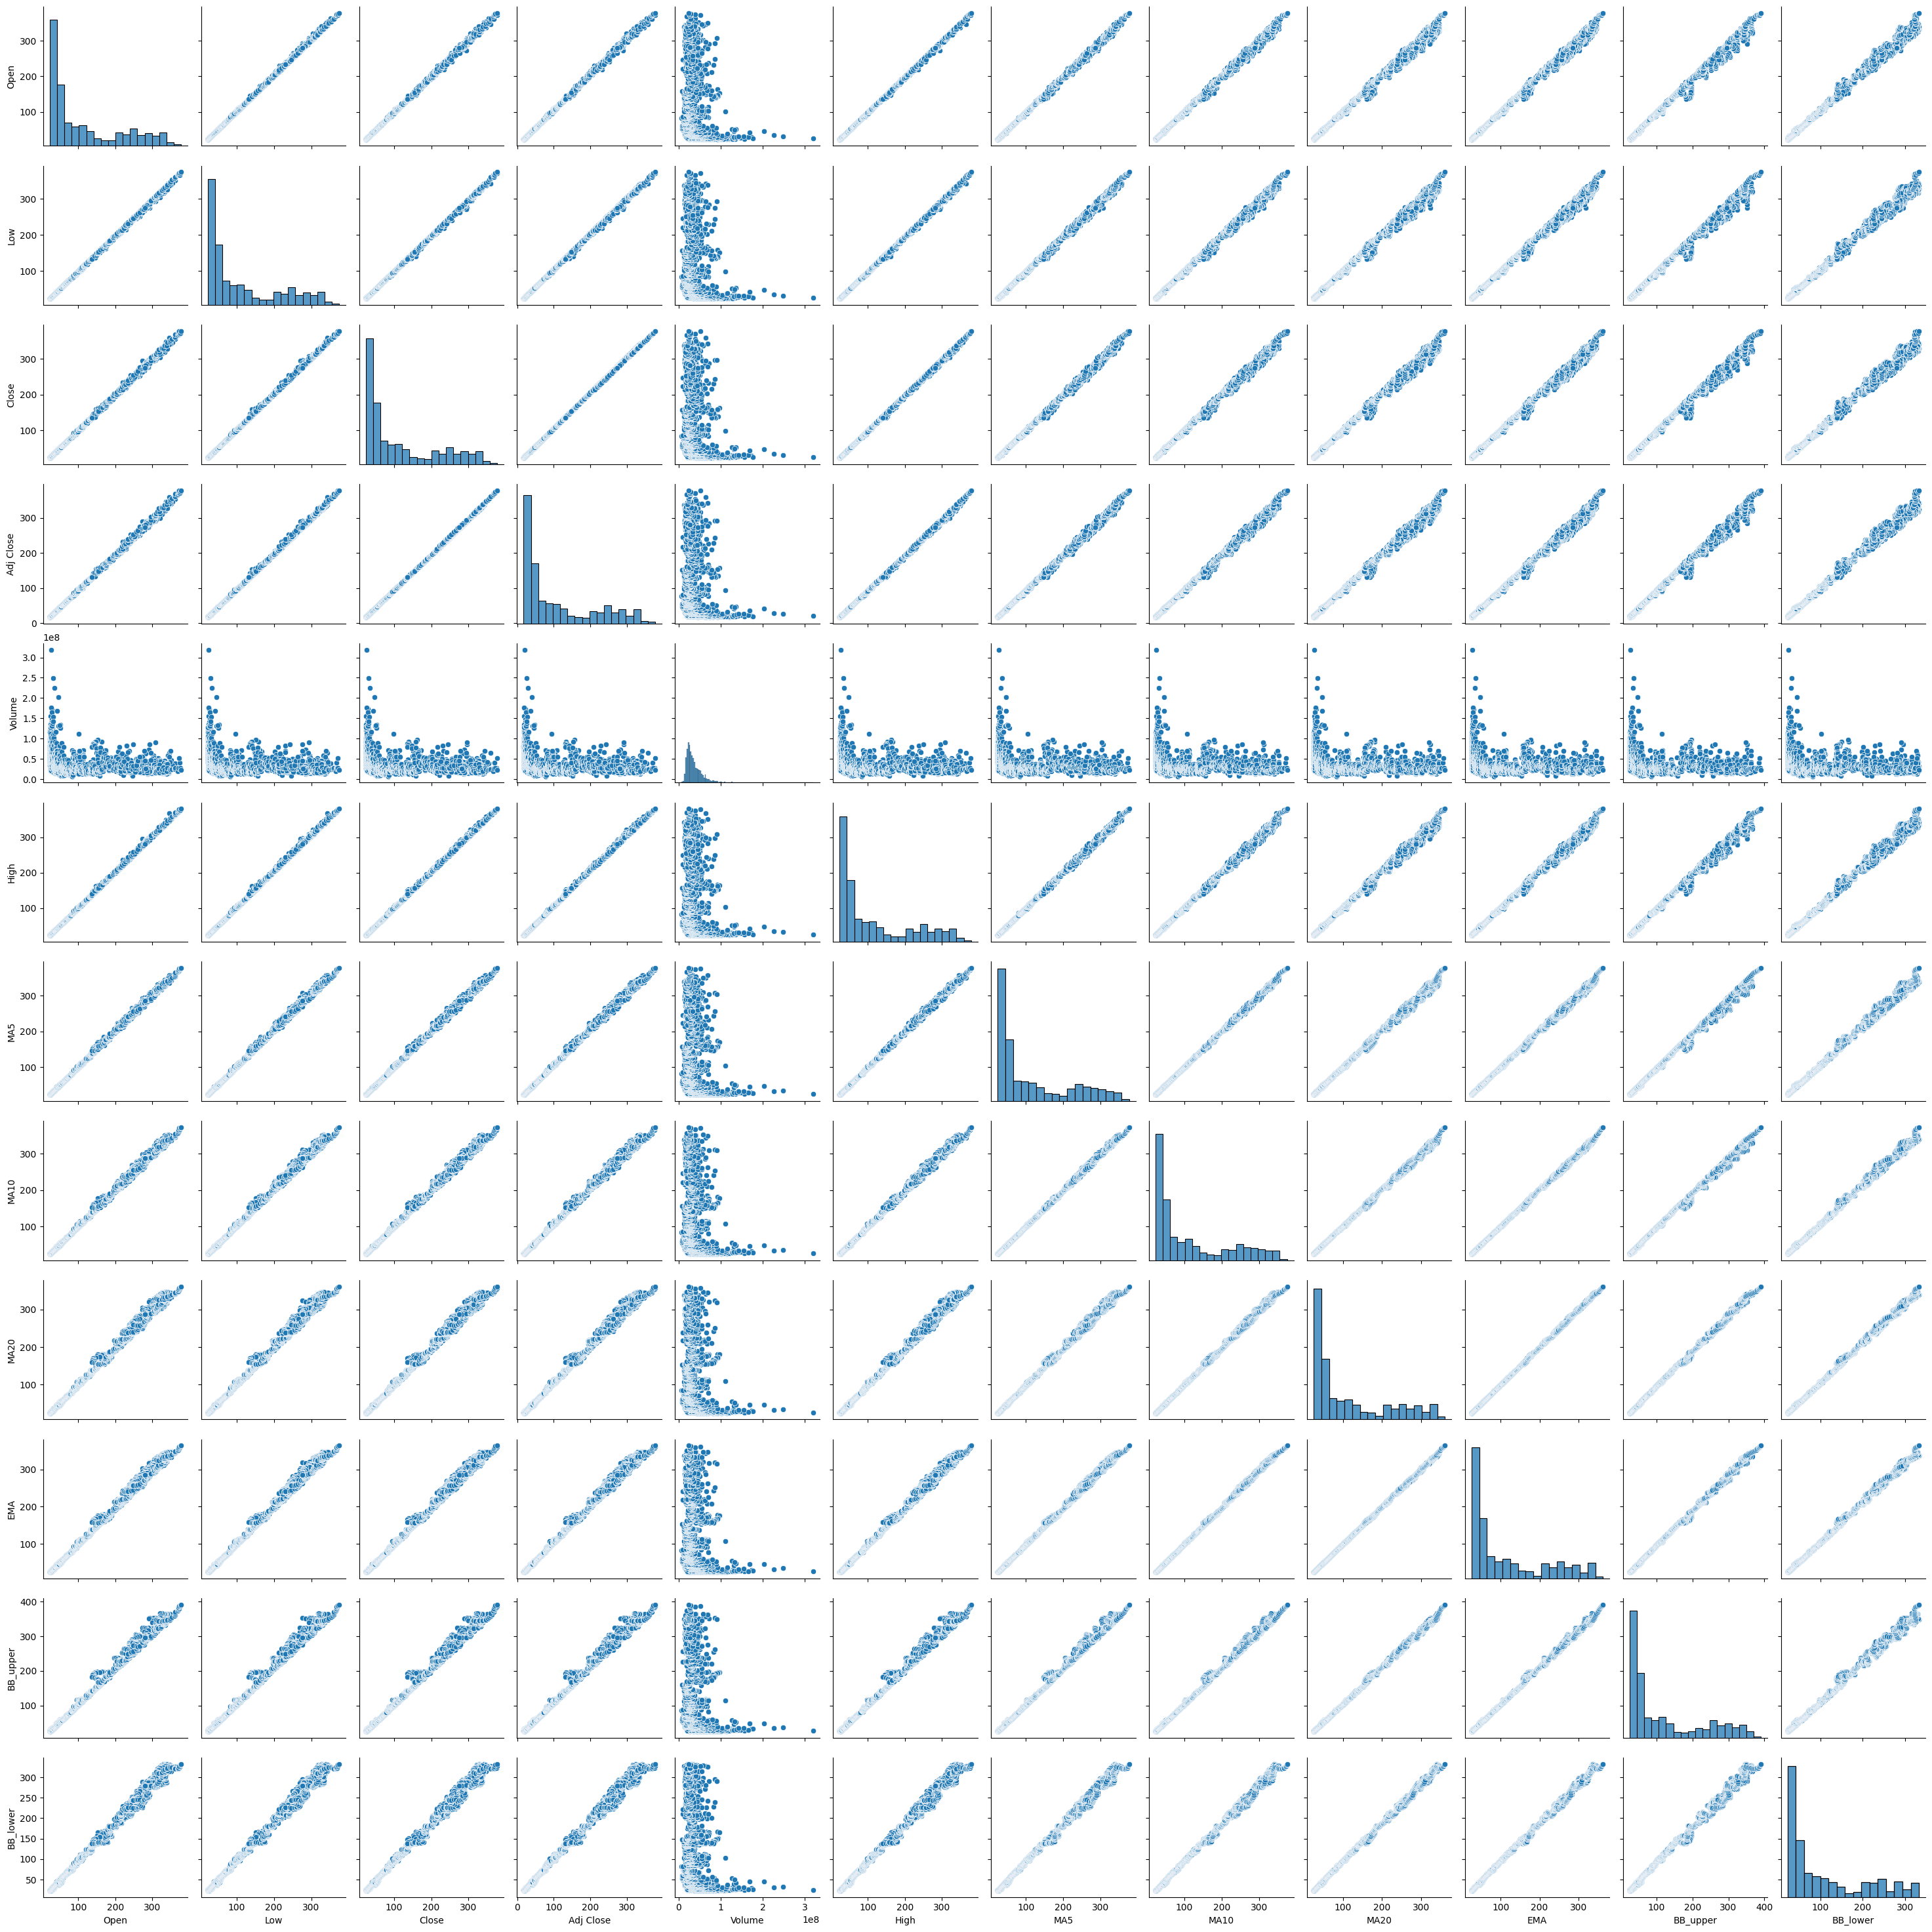

In [6]:
import seaborn as sns  #to plot graphs #for linear regression model
sns.pairplot(data)
plt.show()

In [7]:
data.dropna()
# Split data into training and testing sets based on dates
train_df = data[:'2020-12-31']
test_df = data['2021-01-01':]

# Extract features and target from the training and testing DataFrames
X_train = train_df.drop(['High'], axis=1)  # Replace 'target_column' with the actual target column name
y_train = train_df['High']

X_test = test_df.drop(['High'], axis=1)
y_test = test_df['High']

# Check the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2750, 11)
(2750,)
(728, 11)
(728,)


In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train_scaled, y_train)

# Print model coefficients (weights)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [116.2476664  -43.17824988 113.95518334  -5.65241186   1.41091596
  29.07207415 -25.88661017   0.40419072  24.32638861   7.32779458
  -7.36426345]
Intercept: 23.174795388920728


In [10]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Display all predictions in table form
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Predicted High Prices': y_pred,
    'Actual High Prices': y_test.values
})

print(predictions_df.head(10))

        Date  Predicted High Prices  Actual High Prices
0 2021-01-04             223.369532          223.000000
1 2021-01-05             220.011780          218.520004
2 2021-01-06             214.788512          216.490005
3 2021-01-07             218.449363          219.339996
4 2021-01-08             220.978925          220.580002
5 2021-01-11             219.688485          218.910004
6 2021-01-12             217.957373          217.100006
7 2021-01-13             217.245832          216.759995
8 2021-01-14             216.882555          217.460007
9 2021-01-15             215.430695          214.509995


In [11]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.2131994721045942
Mean Squared Error (MSE): 2.469285541370716
Root Mean Squared Error (RMSE): 1.5713960485411422


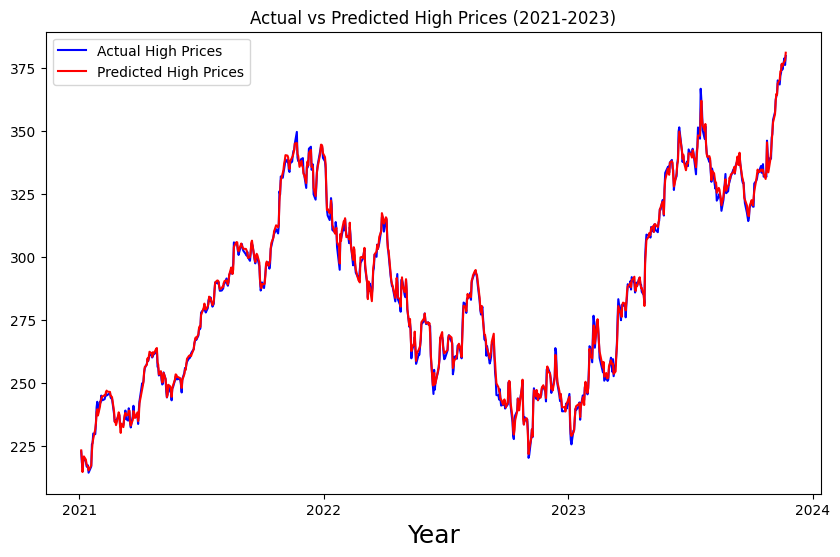

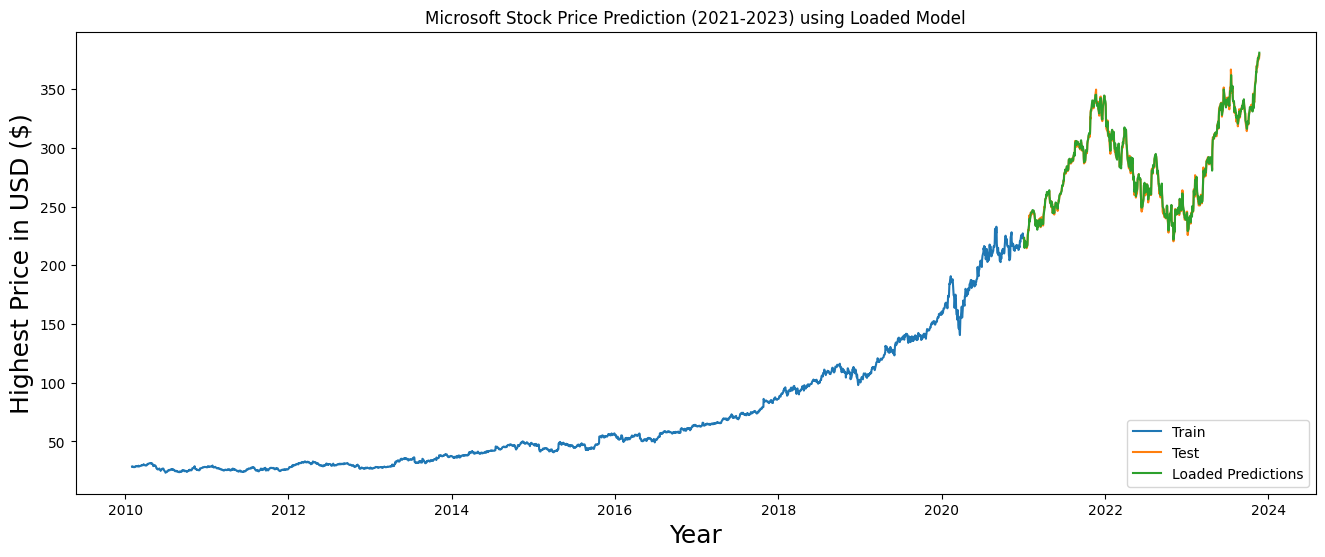

In [12]:
# Define train and valid DataFrames
train = data[:'2020-12-31']
valid = data['2021-01-01':].copy()

# Assuming 'Loaded_Predictions' is already calculated and added to the 'valid' DataFrame
# If not, you need to add the predictions to the 'valid' DataFrame
valid['Loaded_Predictions'] = y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual High Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted High Prices', color='red')
plt.xlabel('Year', fontsize=18)
plt.title('Actual vs Predicted High Prices (2021-2023)')
plt.legend()

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Price Prediction (2021-2023) using Loaded Model')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Highest Price in USD ($)', fontsize=18)
plt.plot(train['High'], label='Train')
plt.plot(valid['High'], label='Test')
plt.plot(valid['Loaded_Predictions'], label='Loaded Predictions')
plt.legend(loc='lower right')
plt.show()

In [14]:
from xgboost import XGBRegressor

# Step 1: Calculate residuals (errors) from Linear Regression model
residuals_train = y_train - model.predict(X_train_scaled)
print("Residuals (Train): " ,residuals_train)

# Step 2: Train XGBoost on residuals
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, residuals_train)

# Step 3: Predict residuals on test data
residuals_test_pred = xgb_model.predict(X_test_scaled)

# Step 4: Combine Linear Regression predictions with XGBoost residual predictions
y_pred_combined = y_pred + residuals_test_pred

# Display predictions in table form
predictions_combined_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual High Prices': y_test.values,
    'Predicted High Prices (Hybrid)': y_pred_combined
    
})

print(predictions_combined_df.head(10))


Residuals (Train):  Date
2010-02-01   -0.569389
2010-02-02   -0.368101
2010-02-03   -0.131898
2010-02-04   -0.195431
2010-02-05   -0.331607
                ...   
2020-12-24   -0.162730
2020-12-28   -0.400260
2020-12-29    0.159080
2020-12-30    0.084210
2020-12-31   -1.285606
Name: High, Length: 2750, dtype: float64
        Date  Actual High Prices  Predicted High Prices (Hybrid)
0 2021-01-04          223.000000                      224.316387
1 2021-01-05          218.520004                      219.218174
2 2021-01-06          216.490005                      215.409773
3 2021-01-07          219.339996                      218.623112
4 2021-01-08          220.580002                      220.465354
5 2021-01-11          218.910004                      219.174913
6 2021-01-12          217.100006                      217.192535
7 2021-01-13          216.759995                      216.160453
8 2021-01-14          217.460007                      216.428307
9 2021-01-15          214.50999

In [15]:
# Calculate metrics for hybrid model
mae_combined = mean_absolute_error(y_test, y_pred_combined)
mse_combined = mean_squared_error(y_test, y_pred_combined)
rmse_combined = np.sqrt(mse_combined)

print(f"Hybrid Model - Mean Absolute Error (MAE): {mae_combined}")
print(f"Hybrid Model - Mean Squared Error (MSE): {mse_combined}")
print(f"Hybrid Model - Root Mean Squared Error (RMSE): {rmse_combined}")

Hybrid Model - Mean Absolute Error (MAE): 1.3279054921508389
Hybrid Model - Mean Squared Error (MSE): 3.092506973710849
Hybrid Model - Root Mean Squared Error (RMSE): 1.758552522306584


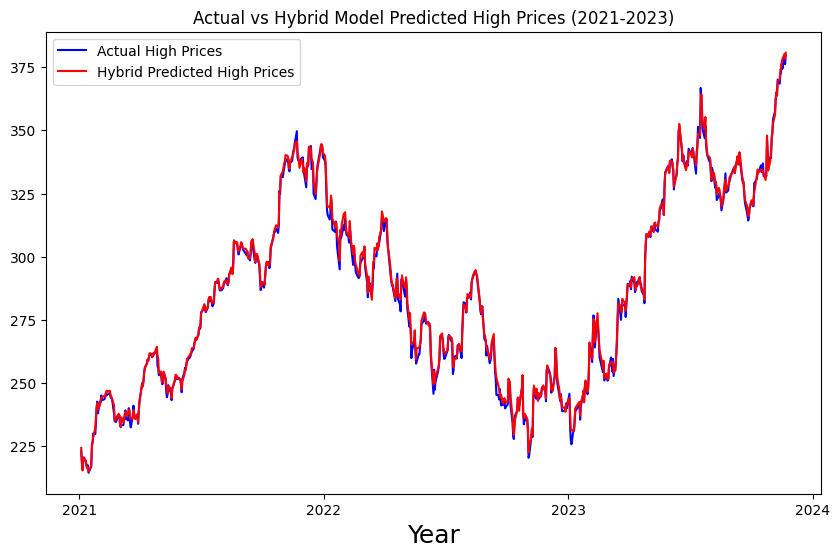

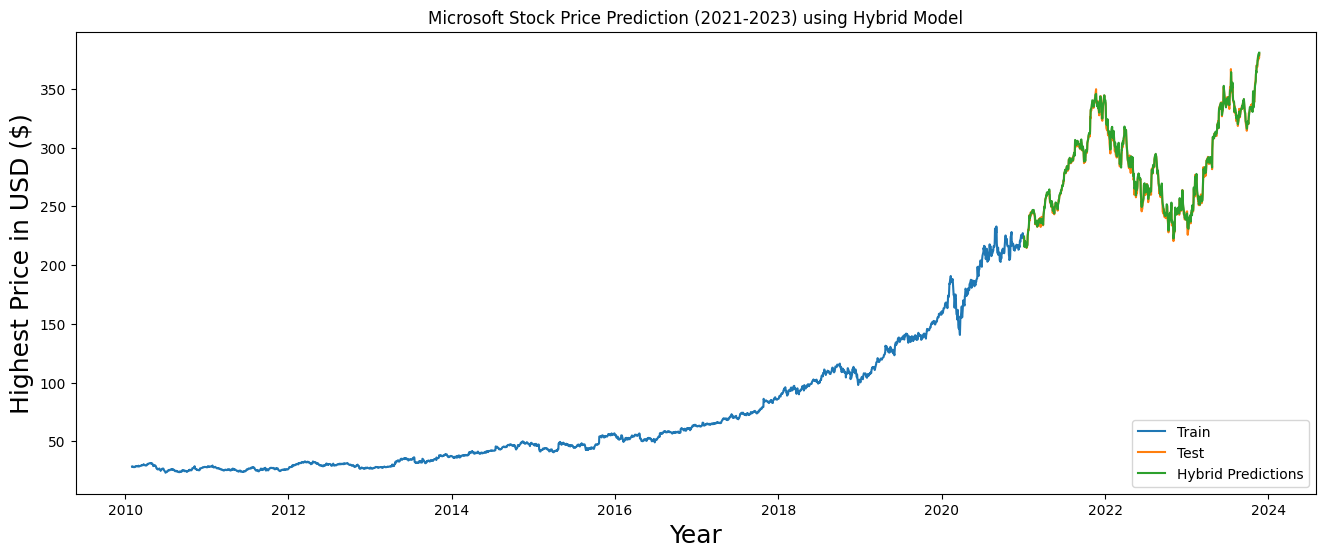

In [16]:
# Plot actual vs hybrid model predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual High Prices', color='blue')
plt.plot(y_test.index, y_pred_combined, label='Hybrid Predicted High Prices', color='red')
plt.xlabel('Year', fontsize=18)
plt.title('Actual vs Hybrid Model Predicted High Prices (2021-2023)')
plt.legend()

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Visualize the data with hybrid model predictions
valid['Hybrid_Predictions'] = y_pred_combined

plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Price Prediction (2021-2023) using Hybrid Model')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Highest Price in USD ($)', fontsize=18)
plt.plot(train['High'], label='Train')
plt.plot(valid['High'], label='Test')
plt.plot(valid['Hybrid_Predictions'], label='Hybrid Predictions')
plt.legend(loc='lower right')
plt.show()


            Predicted High Prices
2023-11-23             380.713301
2023-11-24             380.713301
2023-11-27             380.713301
2023-11-28             380.713301
2023-11-29             380.713301
...                           ...
2024-06-27             380.713301
2024-06-28             380.713301
2024-07-01             380.713301
2024-07-02             380.713301
2024-07-03             380.713301

[160 rows x 1 columns]


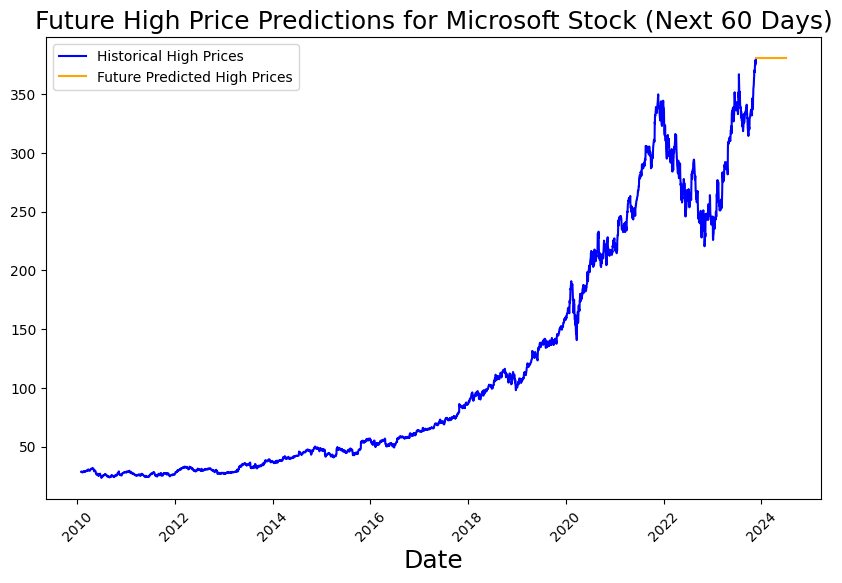

In [35]:
# %% Predict future 60 days

# Step 1: Prepare the features for the next 60 days
last_date = data.index[-1]  # Get the last date in the dataset
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=160, freq='B')  # Generate next 60 business days

# Create a DataFrame for future predictions
future_df = pd.DataFrame(index=future_dates)

# Fill in the last known values for the features
# You may need to adjust this depending on your feature engineering
last_row = data.iloc[-1]

# Use the last known values to project into the future
for feature in ['Open', 'Low', 'Close', 'Adj Close', 'Volume', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']:
    future_df[feature] = last_row[feature]

# The following code assumes that you will be updating features based on a specific logic
# Here, we are using the same last values for demonstration purposes
# You can implement your own logic to update these values based on expected trends or use a random walk model.

# Step 2: Scale the future features using the same scaler
future_df_scaled = scaler.transform(future_df)

# Step 3: Predict using the Linear Regression model
linear_predictions = model.predict(future_df_scaled)

# Step 4: Predict residuals using the XGBoost model
xgb_residuals_pred = xgb_model.predict(future_df_scaled)

# Step 5: Combine predictions for the final output
future_predictions = linear_predictions + xgb_residuals_pred

# Step 6: Create a DataFrame for the final predictions
future_predictions_df = pd.DataFrame({
    'Predicted High Prices': future_predictions
}, index=future_dates)

# Step 7: Display the future predictions
print(future_predictions_df)

# Step 8: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['High'], label='Historical High Prices', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted High Prices'], label='Future Predicted High Prices', color='orange')
plt.xlabel('Date', fontsize=18)
plt.title('Future High Price Predictions for Microsoft Stock (Next 60 Days)', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.show()